In [5]:
from kid_readout.utils import readoutnc
from kid_readout.analysis import noise_measurement
plt.rcParams['font.size'] = 11

In [6]:
rnc = readoutnc.ReadoutNetCDF('/data/readout/2015-07-06_164951_compressor_noise_0.120_K.nc')

In [8]:
rnc.close()

In [9]:
index_off = 1
resonator_index = 13
pca_NFFT = 2**15
snm = noise_measurement.SweepNoiseMeasurement('/data/readout/2015-07-06_164951_compressor_noise_0.120_K.nc',
                                              sweep_group_index=index_off,
                                              timestream_group_index=index_off,
                                              resonator_index=resonator_index,
                                              pca_NFFT=pca_NFFT)                                        


/home/flanigan/kid_readout/kid_readout/analysis/iqnoise.py:235: ComplexWarning: Casting complex values to real discards the imaginary part
  Pxx[:, i] = np.conjugate(fx[:numFreqs]) * fx[:numFreqs]
/home/flanigan/kid_readout/kid_readout/analysis/iqnoise.py:236: ComplexWarning: Casting complex values to real discards the imaginary part
  Pyy[:, i] = np.conjugate(fy[:numFreqs]) * fy[:numFreqs]
/home/flanigan/kid_readout/kid_readout/analysis/iqnoise.py:144: ComplexWarning: Casting complex values to real discards the imaginary part
  S[0, k] = ss[0, 0]
/home/flanigan/kid_readout/kid_readout/analysis/iqnoise.py:145: ComplexWarning: Casting complex values to real discards the imaginary part
  S[1, k] = ss[1, 1]


In [13]:
snm.atten

41.0

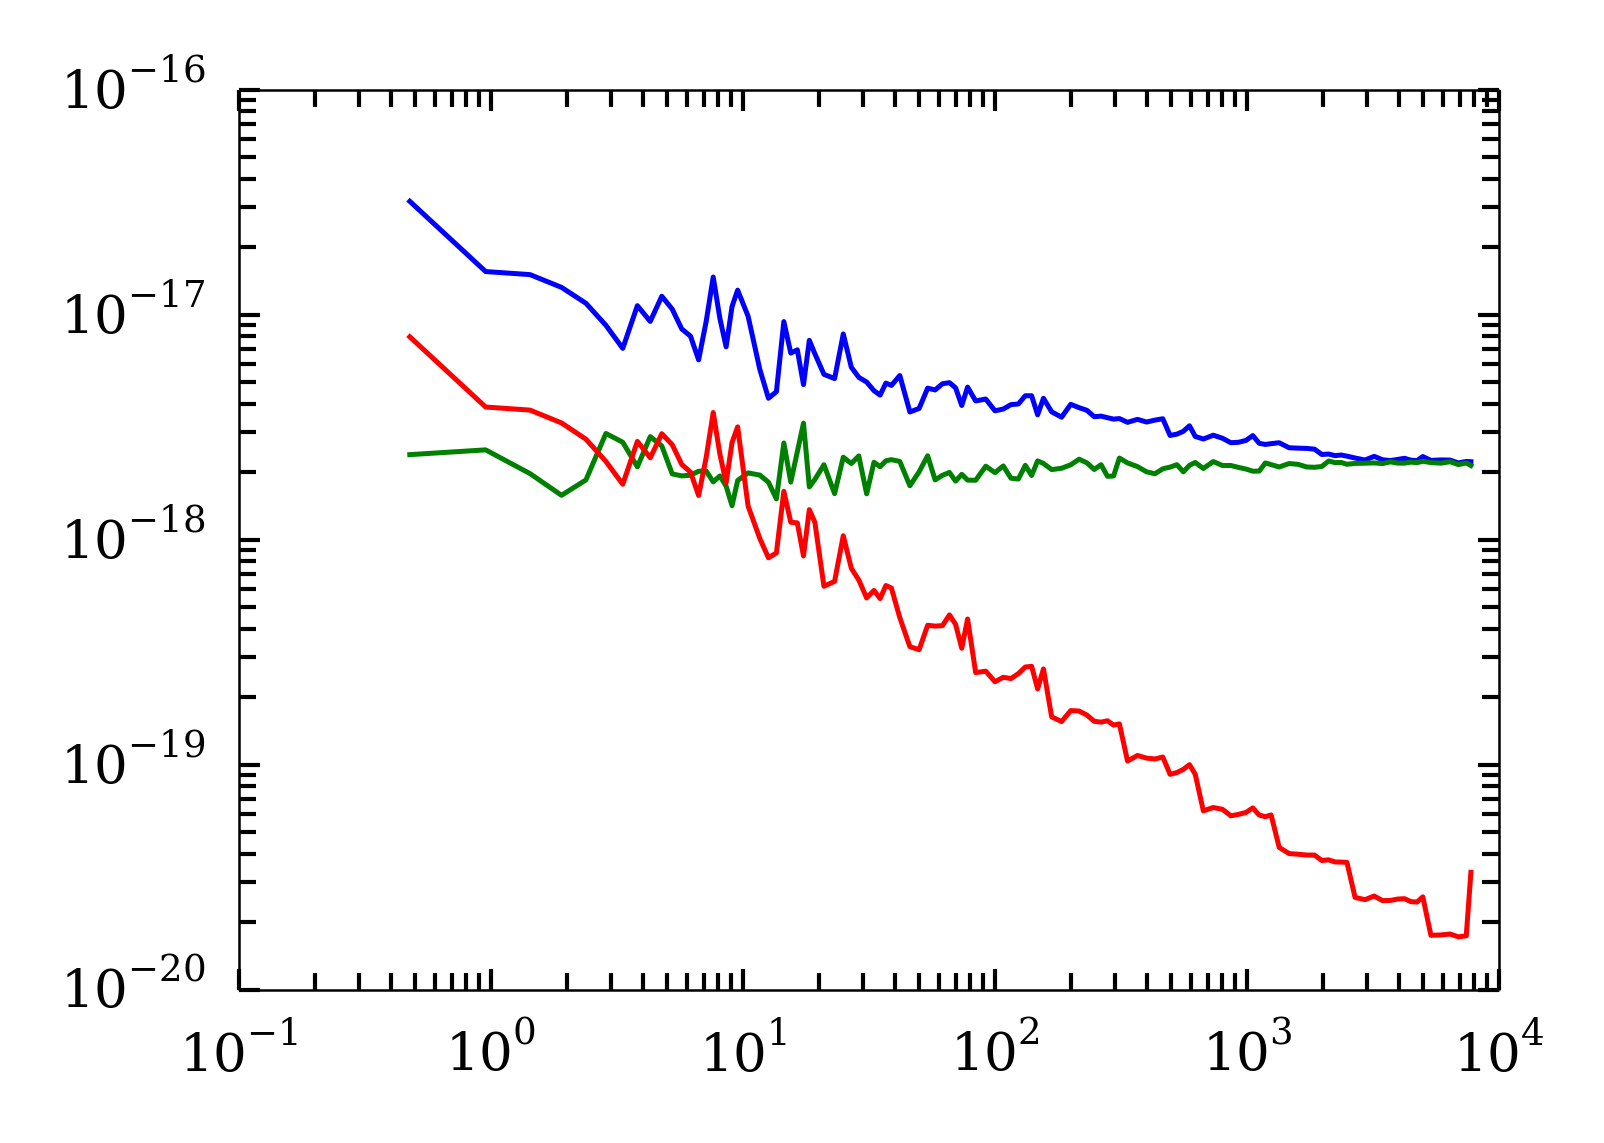

In [12]:
plt.loglog(snm.epca_freq, snm.epca_evals[1])
plt.loglog(snm.epca_freq, snm.epca_evals[0])
plt.loglog(snm.epca_freq, snm.epca_variance[1]**(1/2))

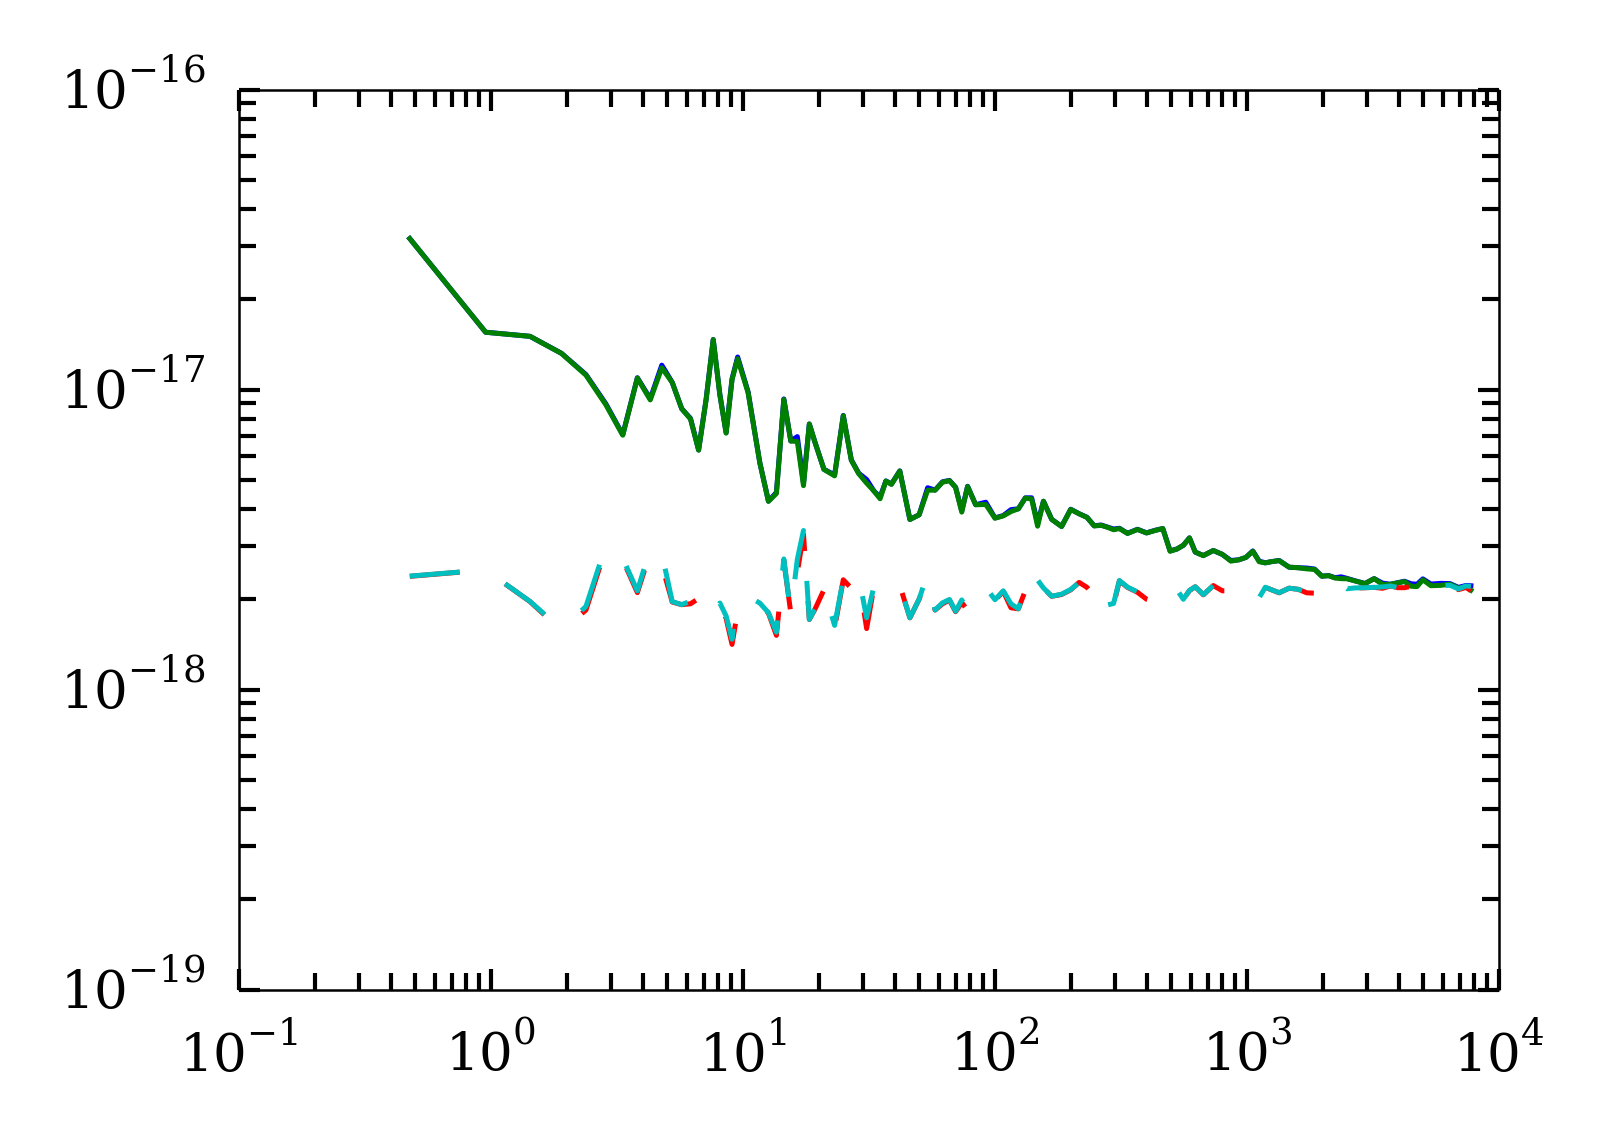

In [17]:
plt.loglog(snm.epca_freq, snm.epca_evals[1])
plt.loglog(snm.epca_freq, snm.epca_spectra[0])
plt.loglog(snm.epca_freq, snm.epca_evals[0], '--')
plt.loglog(snm.epca_freq, snm.epca_spectra[1], '--')

In [15]:
data = {'amp': snm.epca_evals[0],
        'dev': snm.epca_evals[1],
        'sigma': snm.epca_variance[1]**(1/2)}
with open('../Max/2015-12-21_dark_spectrum/dark_log-binned_2015-12-21.npz', 'w') as f:
    np.savez(f, **data)